In [1]:
import random
random.seed(7)
from exercise_5_12 import *

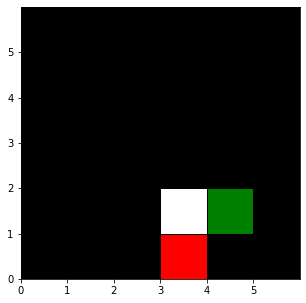

In [2]:
starting_line, finishing_line, track = get_small_map()
plot_map(starting_line, finishing_line, track, (6, 6), (5, 5))

In [3]:
policy, b, Q, C = initialize_learning_off_pol(starting_line, track)

In [9]:
states = []
actions = []
rewards = []
states, actions, rewards = generate_episode(starting_line, finishing_line, track, b, noise=0.0)
states

[(3, 0, 0, 0),
 (3, 1, 0, 1),
 (3, 0, 0, 0),
 (3, 1, 0, 1),
 (3, 0, 0, 0),
 (3, 1, 0, 1),
 (3, 0, 0, 0),
 (3, 0, 0, 0),
 (3, 1, 0, 1),
 (3, 0, 0, 0),
 (3, 0, 0, 0),
 (3, 1, 0, 1),
 (3, 0, 0, 0),
 (3, 0, 0, 0)]

In [10]:
actions

[(0, 1),
 (0, 1),
 (0, 1),
 (0, 0),
 (0, 1),
 (1, 1),
 (1, 0),
 (0, 1),
 (0, 1),
 (1, 0),
 (0, 1),
 (0, 0),
 (1, 0),
 (1, 1)]

In [11]:
rewards

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0]

In [13]:
policy, b, Q, C = initialize_learning_off_pol(starting_line, track)
states = [(3, 0, 0, 0), (3, 1, 0, 1)]
actions = [(0, 1), (1, -1)]
rewards = [-1, 0]

In [14]:
G = 0
W = 1
for t in range(len(states) - 1, -1, -1):
    s = states[t]
    a = actions[t]
    G = 1 * G + rewards[t]
    C[(s, a)] += W
    Q[(s, a)] += (W / C[(s, a)]) * (G - Q[(s, a)])
    print("s a:", s, a)
    print("Q[(s, a)]:", Q[(s, a)])
    print(policy[s])
    policy[s] = get_eps_greedy_probabilities(s, get_greedy_action(Q, s))
    print(policy[s])
    if policy[s] != a:
        print("break")
        print("--------------------")
        break
    W = W * (1 / b[s][a])
    print("--------------------")

s a: (3, 1, 0, 1) (1, -1)
Q[(s, a)]: 0.0
{(0, 0): 1.0, (0, 1): 0.0, (1, -1): 0.0, (1, 0): 0.0, (1, 1): 0.0}
{(0, 0): 1.0, (0, 1): 0.0, (1, -1): 0.0, (1, 0): 0.0, (1, 1): 0.0}
break
--------------------


In [8]:
#policy, Q, C = learn_from_episode_off_pol(policy, b, Q, C, states, actions, rewards)